# Observation: SETI

# **Maximum Likelihood Estimators**

# Background

## Likelihood-Based Inference

A common situation in experimental science is 'fitting' data to a model of our experiment with the goal of determining the parameters of the model. Another way to think about what we are doing in this situation is finding the parameters that are most likely to lead to the observed data. Mathematically, this is a maximization problem.

The description below is from Wikipedia 8/16/25:

Likelihood-based inference is a paradigm used to estimate the parameters of a statistical model based on observed data. Likelihoodism approaches statistics by using the likelihood function, denoted as
$L(x | \theta)$, quantifies the probability of observing the given data
$x$, assuming a specific set of parameter values $\theta$. In likelihood-based inference, the goal is to find the set of parameter values that maximizes the likelihood function, or equivalently, maximizes the probability of observing the given data.

### The process of likelihood-based inference usually involves the following steps:

1. Formulating the statistical model: A statistical model is defined based on the problem at hand, specifying the distributional assumptions and the relationship between the observed data and the unknown parameters. The model can be simple, such as a normal distribution with known variance, or complex, such as a hierarchical model with multiple levels of random effects.
2. Constructing the likelihood function: Given the statistical model, the likelihood function is constructed by evaluating the joint probability density or mass function of the observed data as a function of the unknown parameters. This function represents the probability of observing the data for different values of the parameters.
3. Maximizing the likelihood function: The next step is to find the set of parameter values that maximizes the likelihood function. This can be achieved using optimization techniques such as numerical optimization algorithms. The estimated parameter values, denoted as $\hat{\beta}$, are the maximum likelihood estimates (MLEs).
4. Assessing uncertainty: Once the MLEs are obtained, it is crucial to quantify the uncertainty associated with the parameter estimates. This can be done by calculating standard errors, confidence intervals, or conducting hypothesis tests based on asymptotic theory or simulation techniques such as bootstrapping.
5. Model checking: After obtaining the parameter estimates and assessing their uncertainty, it is important to assess the adequacy of the statistical model. This involves checking the assumptions made in the model and evaluating the fit of the model to the data using goodness-of-fit tests, residual analysis, or graphical diagnostics.
6. Inference and interpretation: Finally, based on the estimated parameters and model assessment, statistical inference can be performed. This involves drawing conclusions about the population parameters, making predictions, or testing hypotheses based on the estimated model.

## Key Concepts and Learning Goals

- Parameter estimation
- Distinguishing between a parameter in a model and its estimator based on analysis
- Be familiar with the MLEs (Maximum Likelihood Estimators) for common distribution functions

# Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Example 1: Coin Flip

The pre-assignment starts with a simple example: estimating the probability of the number of heads $k$ observed from a number of coin flips $n$. Choose $n$ to be at least 100 and initially assume an evenly weighted coin, i.e. the probability of getting heads for any independent trial is 0.5.

For a series of independent coin flips, the likelihood of observing a specific sequence is the product of the probabilities of each individual flip. If we have $k$ heads and $n-k$ tails in $n$ flips, the likelihood is:

$$\mathcal{L}(\theta) = \theta^k (1-\theta)^{n-k}$$

The log-likelihood is the natural logarithm of the likelihood, which is often easier to work with mathematically:

$$W(\theta) = \ln(\mathcal{L}(\theta)) = k \ln(\theta) + (n-k) \ln(1-\theta)$$

Let's write a function to calculate the likelihood and log-likelihood for our synthetic coin flip data and then plot them for a range of possible values for $\theta$ (the probability of heads). In the synthetic data we generate below, Heads = 1 and Tails = 0. The coin can be 'weighted' by changing the variable *true_p_heads*, which we initially set to 0.5.

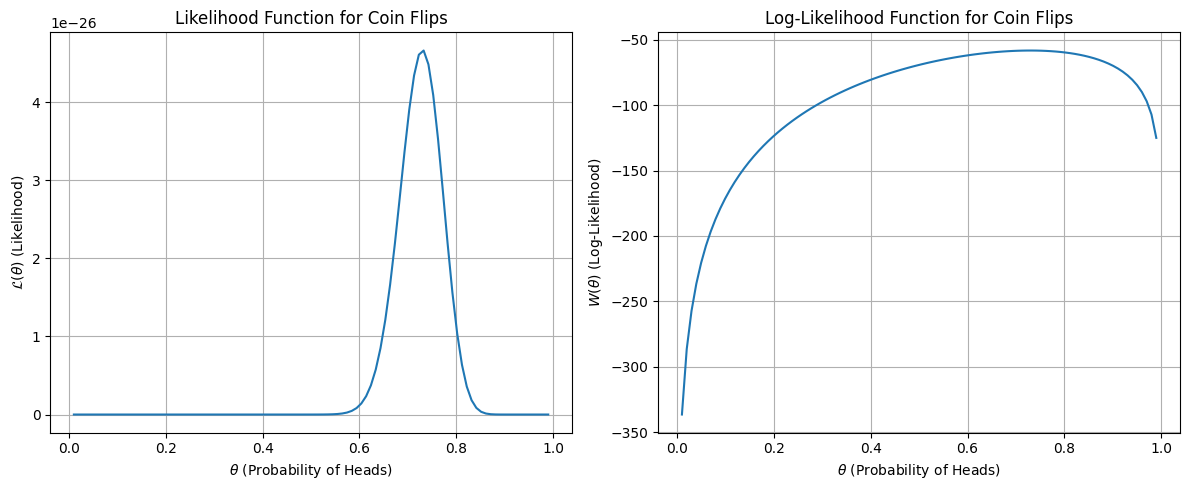

In [17]:
def likelihood(theta, data):
    """Calculates the likelihood for number of heads given a probability of heads."""
    k = np.sum(data) # Number of heads
    n = len(data)   # Total number of flips
    # Avoid issues with log(0)
    if theta == 0:
        return (1 - theta)**(n - k) if k == 0 else 0
    if theta == 1:
        return theta**k if k == n else 0
    return (theta**k) * ((1 - theta)**(n - k))

def log_likelihood(theta, data):
    """Calculates the log-likelihood for a number of heads given a probability of heads."""
    k = np.sum(data) # Number of heads
    n = len(data)   # Total number of flips
    # Avoid issues with log(0)
    if theta == 0 or theta == 1:
        return -np.inf # Log-likelihood is negative infinity at the boundaries
    return k * np.log(theta) + (n - k) * np.log(1 - theta)

# Create an array of possible theta values to evaluate
theta_values = np.linspace(0.01, 0.99, 100) # Avoid 0 and 1 to prevent log(0)

# Choose number of flips and probability of heads, then...
# carry out a simulation of n_flips coin flips
n_flips = 100
true_p_heads = 0.7
coin_flips = np.random.binomial(1, true_p_heads, n_flips)

# Calculate likelihood and log-likelihood for each theta value.
likelihood_values = [likelihood(theta, coin_flips) for theta in theta_values]
log_likelihood_values = [log_likelihood(theta, coin_flips) for theta in theta_values]

# Plot the likelihood and log-likelihood
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(theta_values, likelihood_values)
plt.xlabel(r'$\theta$ (Probability of Heads)')
plt.ylabel(r'$\mathcal{L}(\theta)$ (Likelihood)')
plt.title('Likelihood Function for Coin Flips')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(theta_values, log_likelihood_values)
plt.xlabel(r'$\theta$ (Probability of Heads)')
plt.ylabel(r'$W(\theta)$ (Log-Likelihood)')
plt.title('Log-Likelihood Function for Coin Flips')
plt.grid(True)

plt.tight_layout()
plt.show()

### The likelihood function peaks strongly around the probability of flipping heads 50% of the time.

## Maximum Likelihood Estimator for Binomial Distribution

We now want to compare the peak of this distribution with an estimator of maximum likelihood. For the binomial distribution, the maximum likelihood estimator for the probability of success ($\theta$) is given by the sample proportion of successes:

$$\theta^* = \frac{k}{n}$$

where $k$ is the number of successes (heads) and $n$ is the total number of trials (flips). In other words, if you flipped a coin 100 times and you got heads 53 of those times, you would estimate that the probability of getting heads in an independen trial is 53%.

Let's calculate $\theta^*$ for our synthetic data and add a vertical line to the plots to show where this value lies on the likelihood and log-likelihood curves.

Number of heads (k): 45
Total number of flips (n): 100
Maximum Likelihood Estimator for theta (theta*): 0.45


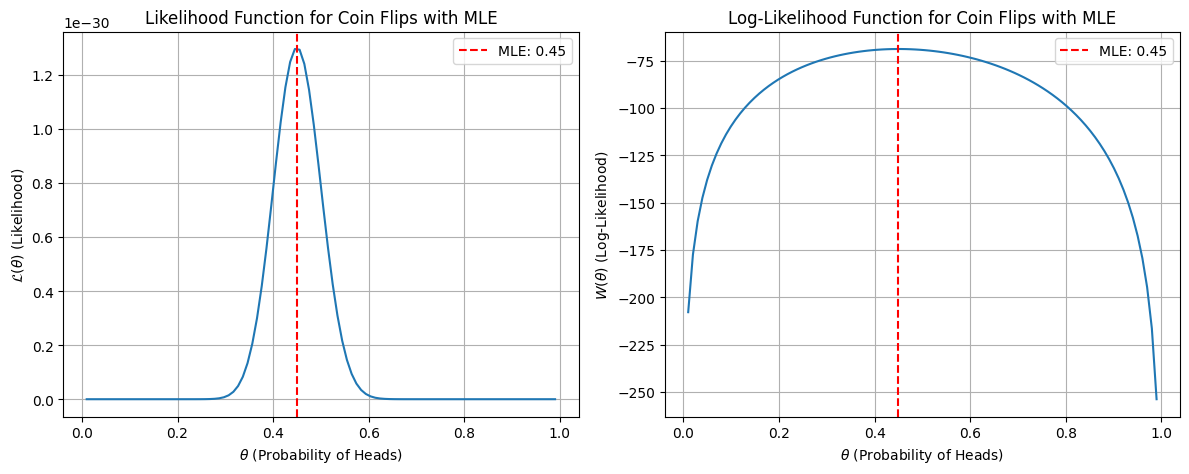

In [3]:
# Calculate the theoretical Maximum Likliehood Estimator for theta
k = np.sum(coin_flips)
n = len(coin_flips)
theta_mle = k / n

print(f"Number of heads (k): {k}")
print(f"Total number of flips (n): {n}")
print(f"Maximum Likelihood Estimator for theta (theta*): {theta_mle}")

# Add a vertical line at the MLE to the existing plots
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(theta_values, likelihood_values)
plt.axvline(theta_mle, color='r', linestyle='--', label=f'MLE: {theta_mle:.2f}')
plt.xlabel(r'$\theta$ (Probability of Heads)')
plt.ylabel(r'$\mathcal{L}(\theta)$ (Likelihood)')
plt.title('Likelihood Function for Coin Flips with MLE')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(theta_values, log_likelihood_values)
plt.axvline(theta_mle, color='r', linestyle='--', label=f'MLE: {theta_mle:.2f}')
plt.xlabel(r'$\theta$ (Probability of Heads)')
plt.ylabel(r'$W(\theta)$ (Log-Likelihood)')
plt.title('Log-Likelihood Function for Coin Flips with MLE')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

### Why isn't the MLE exactly 0.5 (or the probability of getting heads)?

# Example 2: Normal Distribution

### We introduced the Gaussian distribution in an earlier lecture. In the derivation and example below, we are assuming that we know the true mean and the standard deviation so that we can show how to estimate their values using the MLE method. In a typical experiment, we might use MLE to calculate the mean and standard deviation *assuming* that we have a Gaussian distribution.

# Mean of Gaussian (First Moment)

## Theory (see also slides)

Now let's apply the concept of Maximum Likelihood Estimation to a continuous distribution, the Gaussian (Normal) distribution.

For a single data point $x_i$ from a Gaussian distribution with mean $a$ and standard deviation $\sigma$, the probability density function is:

<br>

$$\large f(x_i | a, \sigma) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x_i - a)^2}{2\sigma^2}\right)$$

<br>

Think of this as what value of $x$ are we most likely to observe; we often think about this as the 'peak' in a spectrum, for example. For a set of independent data points $x_1, x_2, \dots, x_n$, as you might measure in an experiment, the likelihood function for the complete 'curve' is the product of the individual probability density functions for each of the independent measurements:

<br>

$$\mathcal{L}(a, \sigma | x_1, \dots, x_n) = \prod_{i=1}^n f(x_i | a, \sigma) = \prod_{i=1}^n \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x_i - a)^2}{2\sigma^2}\right)$$

<br>

The log-likelihood function, $W(a, \sigma)$, is the natural logarithm of the likelihood:

$$W(a, \sigma) = \ln(\mathcal{L}(a, \sigma)) = \sum_{i=1}^n \ln\left(\frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x_i - a)^2}{2\sigma^2}\right)\right),$$

<br>

which can be simplified to:

<br>

$$\large W(a, \sigma) = -\frac{n}{2} \ln(2\pi) - \frac{n}{2} \ln(\sigma^2) - \sum_{i=1}^n \frac{(x_i - a)^2}{2\sigma^2}$$

<br>

For the Gaussian distribution, the maximum likelihood estimator for the mean ($a$) is determined by finding the value of $a$ that maximizes $W$, which corresponds to minimizing the last term:

<br>

$$\Large a^* = \frac{1}{n} \sum_{i=1}^n x_i$$

<br>

We recognize this as the mean, or first moment of the distribution.

## Simulation: Compare log likelihood function with mean

### We'll start by generating some synthetic data from a Gaussian distribution with a known mean ( $a$ ) and standard deviation ( $σ$ ).We'll then write a function to calculate the log-likelihood for our Gaussian data. To visualize, we'll fix  $σ$  to its true value and plot the log-likelihood as a function of  $a$.

Maximum Likelihood Estimator for the mean (a*): 10.2547


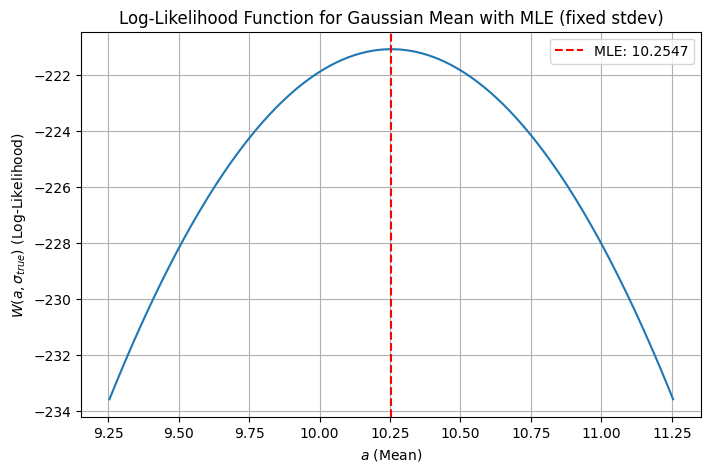

In [4]:
# Generate synthetic data from a Gaussian distribution
np.random.seed() # add an argument for reproducibility

# Define the true parameters for the Gaussian distribution.
# There is no special significance here. We just choose convenient values.
true_mean_a = 10
true_std_dev_sigma = 2
n_samples = 100 # Number of data points

# Generate the data. This creates an array of simulated data.
gaussian_data = np.random.normal(true_mean_a, true_std_dev_sigma, n_samples)

#print("Synthetic Gaussian data (first 10 samples):", gaussian_data[:10])
#print(f"\nNumber of data points: {n_samples}")

# Calculate the theoretical MLE for the mean (a)
a_mle = np.mean(gaussian_data)

print(f"Maximum Likelihood Estimator for the mean (a*): {a_mle:.4f}")

# Define the log-likelihood function for a Gaussian distribution
def gaussian_log_likelihood(a, sigma, data):
    """Calculates the log-likelihood for Gaussian data given a mean (a) and std dev (sigma)."""
    n = len(data)
    sigma_squared = sigma**2
    # Avoid issues with log(0)
    if sigma_squared <= 0:
        return -np.inf
    sum_of_squares = np.sum((data - a)**2)
    log_likelihood = -n/2 * np.log(2 * np.pi) - n/2 * np.log(sigma_squared) - sum_of_squares / (2 * sigma_squared)
    return log_likelihood

# Create an array of possible 'a' values to evaluate (centered around the MLE)
a_values = np.linspace(a_mle - 1, a_mle + 1, 100)

# Calculate log-likelihood for each 'a' value, fixing 'sigma' at its true value
log_likelihood_values_a = [gaussian_log_likelihood(a, true_std_dev_sigma, gaussian_data) for a in a_values]

# Add a vertical line at the MLE to the existing plot
plt.figure(figsize=(8, 5))
plt.plot(a_values, log_likelihood_values_a)
plt.axvline(a_mle, color='r', linestyle='--', label=f'MLE: {a_mle:.4f}')
plt.xlabel(r'$a$ (Mean)')
plt.ylabel(r'$W(a, \sigma_{true})$ (Log-Likelihood)')
plt.title('Log-Likelihood Function for Gaussian Mean with MLE (fixed stdev)')
plt.grid(True)
plt.legend()
plt.show()

We can see that the estimator of the maximum likelihood (the mean) corresponds to the peak of the log likelihood function.  

# Variance of Gaussian (Second Moment): what variance maximizes the log likelihood function?

## Theory

**Theory:** Now let's consider the maximum likelihood estimator for the variance ($\sigma^2$). Again, to find the value of $\sigma^2$ that maximizes the log-likelihood function, we can take the partial derivative of the log-likelihood with respect to $\sigma^2$, set it to zero, and solve for $\sigma^2$.

Recall the log-likelihood function for the Gaussian distribution:

$$W(a, \sigma^2) = -\frac{n}{2} \ln(2\pi) - \frac{n}{2} \ln(\sigma^2) - \sum_{i=1}^n \frac{(x_i - a)^2}{2\sigma^2}$$

Taking the partial derivative with respect to $\sigma^2$:

<!--
$$\frac{\partial W}{\partial (\sigma^2)} = -\frac{n}{2} \cdot \frac{1}{\sigma^2} - \sum_{i=1}^n (x_i - a)^2 \cdot \left(-\frac{1}{2(\sigma^2)^2}\right)$$
-->

$$\frac{\partial W}{\partial (\sigma^2)} = -\frac{n}{2\sigma^2} + \frac{1}{2(\sigma^2)^2} \sum_{i=1}^n (x_i - a)^2$$

Setting the derivative to zero to find the maximum:

$$-\frac{n}{2\sigma^2} + \frac{1}{2(\sigma^2)^2} \sum_{i=1}^n (x_i - a)^2 = 0$$

leads to

<!--
Multiply by $2(\sigma^2)^2$:

$$-n\sigma^2 + \sum_{i=1}^n (x_i - a)^2 = 0$$

Solving for $\sigma^2$:

$$n\sigma^2 = \sum_{i=1}^n (x_i - a)^2$$
-->

$$\sigma^2 = \frac{1}{n} \sum_{i=1}^n (x_i - a)^2.$$

When estimating both $a$ and $\sigma^2$, we use the maximum likelihood estimator for $a$, which is the sample mean $a^*$. So the maximum likelihood estimator for the variance is:

$$(\sigma^*)^2 = \frac{1}{n} \sum_{i=1}^n (x_i - a^*)^2$$

And the maximum likelihood estimator for the standard deviation is:

$$\sigma^* = \sqrt{\frac{1}{n} \sum_{i=1}^n (x_i - a^*)^2}$$

## Simulation

**Comparison with simulation:** Let's calculate $(\sigma^*)^2$ and $\sigma^*$ from our synthetic data using the previously calculated $a^*$.

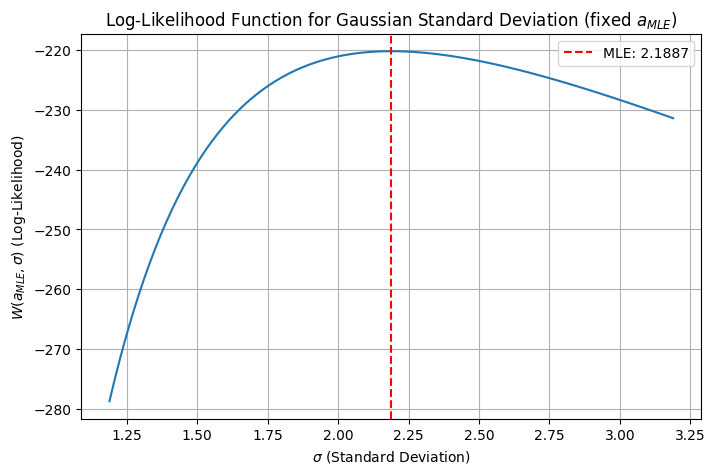

Maximum Likelihood Estimator for the variance ((sigma^2)*): 4.7902
Maximum Likelihood Estimator for the standard deviation (sigma*): 2.1887


In [5]:
# Calculate the theoretical MLE for the variance (sigma^2) and standard deviation (sigma)
# Use the previously calculated MLE for the mean (a_mle)
sigma_squared_mle = np.sum((gaussian_data - a_mle)**2) / n_samples
sigma_mle = np.sqrt(sigma_squared_mle)


# Now let's plot the log-likelihood as a function of sigma, keeping 'a' fixed at a_mle
# Create an array of possible 'sigma' values to evaluate
# Avoid sigma <= 0
sigma_values = np.linspace(sigma_mle - 1, sigma_mle + 1, 100)
sigma_values = sigma_values[sigma_values > 0] # Ensure sigma is positive

# Calculate log-likelihood for each 'sigma' value, fixing 'a' at a_mle
log_likelihood_values_sigma = [gaussian_log_likelihood(a_mle, sigma, gaussian_data) for sigma in sigma_values]

# Plot the log-likelihood as a function of 'sigma'
plt.figure(figsize=(8, 5))
plt.plot(sigma_values, log_likelihood_values_sigma)
plt.axvline(sigma_mle, color='r', linestyle='--', label=f'MLE: {sigma_mle:.4f}')
plt.xlabel(r'$\sigma$ (Standard Deviation)')
plt.ylabel(r'$W(a_{MLE}, \sigma)$ (Log-Likelihood)')
plt.title('Log-Likelihood Function for Gaussian Standard Deviation (fixed $a_{MLE}$)')
plt.grid(True)
plt.legend()
plt.show()

print(f"Maximum Likelihood Estimator for the variance ((sigma^2)*): {sigma_squared_mle:.4f}")
print(f"Maximum Likelihood Estimator for the standard deviation (sigma*): {sigma_mle:.4f}")

The estimator of the standard deviation is quite close to the actual value we used to generate the simulated data.

### **Optional Background:** Fisher Information and Cramer-Rao Bound

The **Fisher Information** is a way to measure the amount of information that an observable random variable $X$ carries about an unknown parameter $\theta$ of a distribution that models $X$. It is the variance of the score, or the expected value of the square of the derivative of the log-likelihood function with respect to the parameter.

For a single observation $x$ and a parameter $\theta$, the Fisher Information $I(\theta)$ is defined as:

$$I(\theta) = E\left[\left(\frac{\partial}{\partial \theta} \ln f(x | \theta)\right)^2\right] = -E\left[\frac{\partial^2}{\partial \theta^2} \ln f(x | \theta)\right]$$

where $f(x|\theta)$ is the probability density (or mass) function of $X$ given $\theta$, and the expectation $E[\cdot]$ is taken with respect to $f(x|\theta)$.

For $n$ independent and identically distributed (i.i.d.) observations $x_1, x_2, \dots, x_n$, the total Fisher Information is $n$ times the Fisher Information of a single observation:

$$I_n(\theta) = n I(\theta)$$

The **Cramer-Rao Lower Bound (CRLB)** states that the variance of any unbiased estimator $\hat{\theta}$ for a parameter $\theta$ is bounded below by the reciprocal of the Fisher Information:

$$\text{Var}(\hat{\theta}) \ge \frac{1}{I_n(\theta)}$$

If an unbiased estimator $\hat{\theta}$ achieves this lower bound, it is called a **minimum variance unbiased estimator (MVUE)**.

The Maximum Likelihood Estimator (MLE) is **asymptotically** unbiased and **asymptotically** achieves the Cramer-Rao Lower Bound. This means that for large sample sizes, the variance of the MLE approaches the inverse of the Fisher Information:

$$\text{Var}(\theta_{MLE}) \approx \frac{1}{I_n(\theta)}$$

This relationship is significant because it tells us that the Fisher Information provides a theoretical lower limit on how well we can estimate a parameter from data, and the MLE, for large sample sizes, is an efficient estimator in the sense that its variance is close to this theoretical limit.



# Application: How does variance of MLEs change with sample size (number of measurements)?

### **Theory**: variance of the MLE estimators

We will now calculate how the variance *in the MLE estimator* of the mean $a$ changes a function of sample size (number of measurements) to illustrate the common situation of reducing the uncertainty of a measured value by taking more measurements. We can calculate the change in variance with measurement number by first taking the second partial derivative of the log-likelihood function for the Gaussian distribution with respect to the mean ($a$).

Recall the log-likelihood function:

$$W(a, \sigma^2) = -\frac{n}{2} \ln(2\pi) - \frac{n}{2} \ln(\sigma^2) - \sum_{i=1}^n \frac{(x_i - a)^2}{2\sigma^2}$$

First find the first partial derivative with respect to $a$:
<!--
$$\frac{\partial W}{\partial a} = \frac{\partial}{\partial a} \left( -\frac{n}{2} \ln(2\pi) - \frac{n}{2} \ln(\sigma^2) - \sum_{i=1}^n \frac{(x_i - a)^2}{2\sigma^2} \right)$$

The first two terms do not depend on $a$, so their derivatives are zero.

$$\frac{\partial W}{\partial a} = - \frac{1}{2\sigma^2} \sum_{i=1}^n \frac{\partial}{\partial a} (x_i - a)^2$$

$$\frac{\partial W}{\partial a} = - \frac{1}{2\sigma^2} \sum_{i=1}^n 2(x_i - a) \cdot (-1)$$
-->

$$\frac{\partial W}{\partial a} = \frac{1}{\sigma^2} \sum_{i=1}^n (x_i - a)$$

Now, let's find the second partial derivative with respect to $a$:

$$\frac{\partial^2 W}{\partial a^2} = \frac{\partial}{\partial a} \left( \frac{1}{\sigma^2} \sum_{i=1}^n (x_i - a) \right).$$

<!--
$$\frac{\partial^2 W}{\partial a^2} = \frac{1}{\sigma^2} \sum_{i=1}^n \frac{\partial}{\partial a} (x_i - a)$$

$$\frac{\partial^2 W}{\partial a^2} = \frac{1}{\sigma^2} \sum_{i=1}^n (-1)$$
-->

$$ = -\frac{n}{\sigma^2}$$

This gives us the inverse of the variance:

<br>

 $$\frac{1}{S^2}=-\frac{\partial^2 W}{\partial a^2} = \frac{n}{\sigma^2},$$

<br>

and the standard deviation is $$S = \frac{σ}{\sqrt{n}}$$

<br>

Hence, we expect the standard deviation of the MLE for the mean to decrease with the square root of the number of measurements. In other words, we can take more measurements to get a better estimate (reduced uncertainty).

<!--
We can do the same for the variance ($\sigma^2$).

**Second derivative with respect to the variance ($\sigma^2$):**

First, let's find the first partial derivative with respect to $\sigma^2$. We already did this in the previous markdown cell:

$$\frac{\partial W}{\partial (\sigma^2)} = -\frac{n}{2\sigma^2} + \frac{1}{2(\sigma^2)^2} \sum_{i=1}^n (x_i - a)^2$$

Now, let's find the second partial derivative with respect to $\sigma^2$:

$$\frac{\partial^2 W}{\partial (\sigma^2)^2} = \frac{\partial}{\partial (\sigma^2)} \left( -\frac{n}{2}(\sigma^2)^{-1} + \frac{1}{2} (\sigma^2)^{-2} \sum_{i=1}^n (x_i - a)^2 \right)$$

$$\frac{\partial^2 W}{\partial (\sigma^2)^2} = -\frac{n}{2} (-1)(\sigma^2)^{-2} + \frac{1}{2} (-2)(\sigma^2)^{-3} \sum_{i=1}^n (x_i - a)^2$$

$$\frac{\partial^2 W}{\partial (\sigma^2)^2} = \frac{n}{2(\sigma^2)^2} - \frac{1}{(\sigma^2)^3} \sum_{i=1}^n (x_i - a)^2$$

To simplify, we can find a common denominator:

$$\frac{\partial^2 W}{\partial (\sigma^2)^2} = \frac{n(\sigma^2)}{2(\sigma^2)^3} - \frac{2}{2(\sigma^2)^3} \sum_{i=1}^n (x_i - a)^2$$

$$\frac{\partial^2 W}{\partial (\sigma^2)^2} = \frac{n\sigma^2 - 2 \sum_{i=1}^n (x_i - a)^2}{2(\sigma^2)^3}$$

At the MLE for $\sigma^2$,

$$(\sigma^2)^* = \frac{1}{n} \sum_{i=1}^n (x_i - a^*)^2,$$ so $$\sum_{i=1}^n (x_i - a^*)^2 = n (\sigma^2)^*.$$

Substituting this into the second derivative expression (assuming $a=a^*$):

$$\frac{\partial^2 W}{\partial (\sigma^2)^2} \bigg|_{a=a^*, \sigma^2=(\sigma^2)^*} = \frac{n(\sigma^2)^* - 2 n (\sigma^2)^*}{2((\sigma^2)^*)^3}$$

$$\frac{\partial^2 W}{\partial (\sigma^2)^2} \bigg|_{a=a^*, \sigma^2=(\sigma^2)^*} = \frac{-n(\sigma^2)^*}{2((\sigma^2)^*)^3}$$

$$\frac{\partial^2 W}{\partial (\sigma^2)^2} \bigg|_{a=a^*, \sigma^2=(\sigma^2)^*} = -\frac{n}{2(\sigma^2)^2}$$

So, the second partial derivative with respect to $\sigma^2$ evaluated at the MLEs is:

$$\frac{\partial^2 W}{\partial (\sigma^2)^2} \bigg|_{\text{MLEs}} = -\frac{n}{2(\sigma^2)^2}$$

-->

### **Simulation**: Variance for Different Sample Sizes

To see how the variance of the Maximum Likelihood Estimators changes with sample size, we will perform simulations. For each sample size ($n=10, 100, 1000$), we will generate multiple datasets from a Gaussian distribution with known true parameters. For each generated dataset, we will calculate the MLEs for the mean ($a^*$) and variance ($(\sigma^2)^*$). We will repeat this process many times for each sample size to get a distribution of the estimated MLEs.

We can then determine the variance of the MLEs. We expect that as the sample size ($n$) increases, the variance of these estimators should decrease, approaching the theoretical Cramer-Rao Lower Bound.

#### Simulation

In [18]:
# SIMULATE THE DATA AND CALCULATE MLEs FOR EACH DATA SET

# Define the sample sizes to simulate
sample_sizes = [10, 100, 1000]
n_simulations = 1000 # Number of simulations for each sample size

# True parameters of the Gaussian distribution (using the values defined earlier)
true_mean = true_mean_a
true_variance = true_std_dev_sigma**2

# Dictionaries to store the calculated MLEs for each sample size
mle_means = {n: [] for n in sample_sizes}
mle_variances = {n: [] for n in sample_sizes}

# Perform simulations
for n in sample_sizes:
    print(f"Running {n_simulations} simulations for sample size n = {n}...")
    for _ in range(n_simulations):
        # Generate synthetic data
        data = np.random.normal(true_mean, np.sqrt(true_variance), n)

        # Calculate MLE for the mean (sample mean)
        a_mle_sim = np.mean(data)
        mle_means[n].append(a_mle_sim)

        # Calculate MLE for the variance (sample variance with n in denominator)
        sigma_squared_mle_sim = np.sum((data - a_mle_sim)**2) / n
        mle_variances[n].append(sigma_squared_mle_sim)

print("Simulations complete.")

Running 1000 simulations for sample size n = 10...
Running 1000 simulations for sample size n = 100...
Running 1000 simulations for sample size n = 1000...
Simulations complete.


#### Variance Calculation

In [8]:
# Calculate the variance of the MLEs for each sample size
variance_of_mle_means = {n: np.var(mle_means[n]) for n in sample_sizes}
variance_of_mle_variances = {n: np.var(mle_variances[n]) for n in sample_sizes}

print("Variance of MLE for the Mean (a*):")
for n, variance in variance_of_mle_means.items():
    print(f"  n = {n}: {variance:.6f}")

print("\nVariance of MLE for the Variance ((sigma^2)*):")
for n, variance in variance_of_mle_variances.items():
    print(f"  n = {n}: {variance:.6f}")

Variance of MLE for the Mean (a*):
  n = 10: 0.397602
  n = 100: 0.038246
  n = 1000: 0.003898

Variance of MLE for the Variance ((sigma^2)*):
  n = 10: 3.253306
  n = 100: 0.339072
  n = 1000: 0.030658


#### Plotting

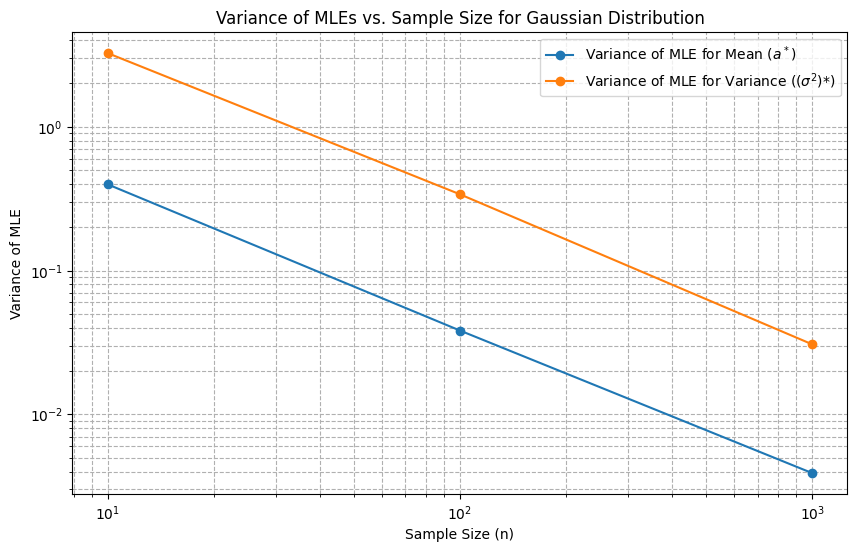

In [16]:
# Plot the variance of MLEs as a function of sample size

plt.figure(figsize=(10, 6))

plt.plot(sample_sizes, list(variance_of_mle_means.values()), marker='o', linestyle='-', label=r'Variance of MLE for Mean ($a^*$)')
plt.plot(sample_sizes, list(variance_of_mle_variances.values()), marker='o', linestyle='-', label=r'Variance of MLE for Variance (($\sigma^2$)*)')

plt.xscale('log') # Use a logarithmic scale for the x-axis (sample size)
plt.yscale('log') # Use a logarithmic scale for the y-axis (variance)

plt.xlabel('Sample Size (n)')
plt.ylabel('Variance of MLE')
plt.title('Variance of MLEs vs. Sample Size for Gaussian Distribution')
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()

### **Conclusion**:

We see that the variance of the MLE for the mean (and the variance) decreases linearly on a log-log plot as expected since it varies as $\frac{1}{n}$:

<br>

$$\Large S^2 = \frac{σ^2}{n}$$

<br>

# Example #3: Observing Laboratory Voltage Signal

When might we have intuitively applied the MLE method to experimental signals in our day to day lab experience? When we do this, what assumptions are we making? How can we test these assumptions?

## Simulation: Voltage versus time

In [10]:
# Simulation 1: Gaussian distribution with fixed mean and standard deviation
# This simulation generates 100 seconds of an experimental signal (voltage) with
# a fixed average. Most experimental signals are converted into voltages for
# digitization and subsequent analysis and storage.

# Parameters
average_voltage = 3.0  # V
std_dev_voltage = 0.5  # V
sampling_rate = 100  # points per second
simulation_duration = 100  # seconds # Increased simulation duration
n_points_sim1 = simulation_duration * sampling_rate

# Generate time points
time_sim1 = np.linspace(0, simulation_duration, n_points_sim1)

# Generate simulated data with fixed mean and standard deviation
simulated_data_fixed = np.random.normal(average_voltage, std_dev_voltage, n_points_sim1)

# print("Simulated Data 1 (Fixed Mean) - first 10 points:", simulated_data_fixed[:10])
# print(f"Number of data points in Simulation 1: {n_points_sim1}")

# Plot the simulated data (first 10 seconds)
# plt.figure(figsize=(12, 6))
# plt.plot(time_sim1[:sampling_rate*10], simulated_data_fixed[:sampling_rate*10]) # Plot only first 10 seconds
# plt.axhline(average_voltage, color='red', linestyle='--', label='Average Voltage') # Plot the average voltage as reference
# plt.xlabel("Time (s)")
# plt.ylabel("Voltage (V)")
# plt.title("Simulated Experimental Measurement (First 10s)")
# plt.grid(True)
# plt.show()

# # Print the average of the simulated voltage data
# print(f"Average of simulated_data_fixed: {np.mean(simulated_data_fixed):.4f} V")

## Plot of Signal versus Time

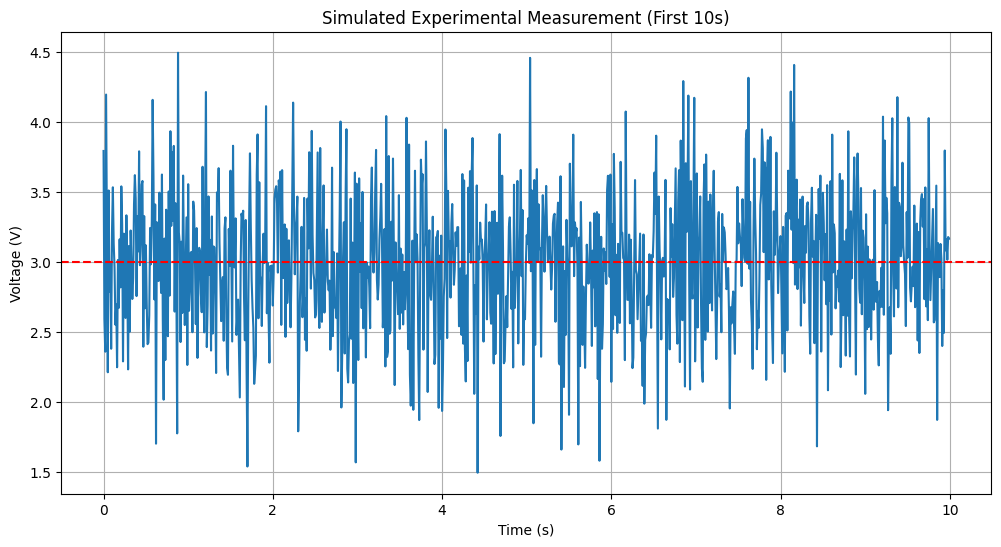

In [11]:
# Plot the simulated data (first 10 seconds)
plt.figure(figsize=(12, 6))
plt.plot(time_sim1[:sampling_rate*10], simulated_data_fixed[:sampling_rate*10]) # Plot only first 10 seconds
plt.axhline(average_voltage, color='red', linestyle='--', label='Average Voltage') # Plot the average voltage as reference
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.title("Simulated Experimental Measurement (First 10s)")
plt.grid(True)
plt.show()

# Print the average of the simulated voltage data
# print(f"Average of simulated_data_fixed: {np.mean(simulated_data_fixed):.4f} V")

## Is the signal constant or drifting?

You may have observed an experimental signal that drifts over time for unknown reasons. We'll simulate what this looks like with 1/f noise, which produces variations that decay in magnitude with frequency. With the right parameters, we'll be able to observe drift in the signal 'by eye'.

### Code

In [12]:
# Use 1/f noise to simulate low frequency drift in current measurement

def generate_one_over_f_noise(n_points, alpha, scale):
    """Generates 1/f-like noise using the spectral synthesis method.

    Args:
        n_points (int): The number of data points to generate.
        alpha (float): The exponent of the power spectrum (e.g., 1 for 1/f).
        scale (float): Scaling factor for the noise amplitude.

    Returns:
        np.ndarray: The generated 1/f noise.
    """
    # Generate complex random numbers in the frequency domain
    # The magnitude follows a power law, and the phase is random
    f = np.fft.rfftfreq(n_points)
    # Handle the zero frequency separately
    power_spectrum = np.zeros_like(f)
    power_spectrum[1:] = np.power(f[1:], -alpha) # Calculate power for non-zero frequencies

    # Generate random phases
    phases = np.random.uniform(0, 2 * np.pi, len(f))
    complex_spectrum = np.sqrt(power_spectrum) * np.exp(1j * phases)

    # Inverse Fourier transform to get the time-domain signal
    noise = np.fft.irfft(complex_spectrum, n_points)

    # Scale the noise
    noise = noise * scale / np.std(noise)

    return noise

# Parameters (same as Simulation 1 initially)
average_voltage_initial = 3.0  # V
std_dev_voltage = 0.5  # V
sampling_rate = 100  # points per second
simulation_duration = 100  # seconds # Increased simulation duration
n_points_sim2 = simulation_duration * sampling_rate

# Generate time points
time_sim2 = np.linspace(0, simulation_duration, n_points_sim2)


# Parameters for 1/f noise
n_points_noise = n_points_sim2 # Same number of points as the simulation
alpha = 1.0 # For 1/f noise
# We need to determine a suitable scale to make it exceed Gaussian fluctuations below 1 Hz
# This might require some experimentation or analysis of the Gaussian noise PSD
# Let's start with a preliminary scale and adjust if needed.
# We know the Gaussian noise has a variance of std_dev_voltage^2 = 0.5^2 = 0.25
# We want the 1/f noise power to be higher than this at low frequencies.
# The PSD of white noise is constant at sigma^2 / fs. For our Gaussian noise, this is 0.25 / 100 = 0.0025 V^2/Hz.
# We want the 1/f noise PSD (proportional to scale^2 * f^-alpha) to be greater than 0.0025 at f < 1 Hz.
# Let's aim for the 1/f noise PSD to be, say, 10 times larger than the Gaussian PSD at 0.5 Hz (a point below 1 Hz).
# scale^2 * (0.5)^-1 >= 10 * 0.0025
# scale^2 * 2 >= 0.025
# scale^2 >= 0.0125
# scale >= sqrt(0.0125) approx 0.11
# Let's start with a scale of 0.2 and see the effect.
# Note- doubled to make effect more obvious.
noise_scale = 0.4


# Generate the 1/f noise
one_over_f_noise = generate_one_over_f_noise(n_points_noise, alpha, noise_scale)

# Generate simulated data with Gaussian and 1/f noise, centered around initial average voltage
simulated_data_drifting = average_voltage_initial + np.random.normal(0, std_dev_voltage, n_points_sim2) + one_over_f_noise


# Plot the simulated data (first 10 seconds) and the original average voltage
# plt.figure(figsize=(12, 6))
# plt.plot(time_sim2[:sampling_rate*10], simulated_data_drifting[:sampling_rate*10],color='orange') # Plot only first 10 seconds
# plt.axhline(average_voltage_initial, color='red', linestyle='--', label='Average Voltage w/o 1/f Noise') # Plot the original average voltage as reference
# plt.xlabel("Time (s)")
# plt.ylabel("Voltage (V)")
# plt.title("Simulated Experimental Measurement (w/drift) - First 10s")
# plt.grid(True)
# plt.legend()
# plt.show()


### Plot of Signal versus Time

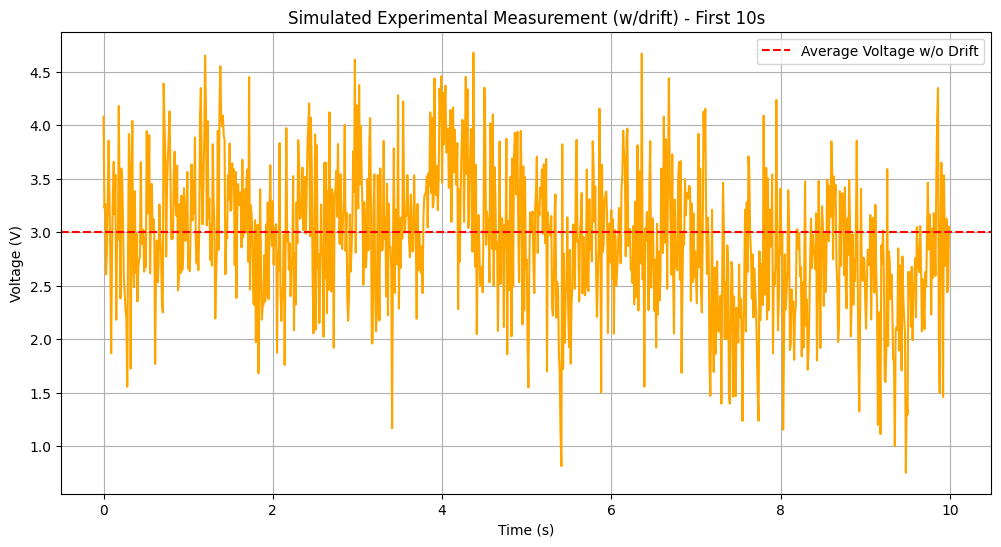

In [ ]:
# Plot the simulated data (first 10 seconds) and the original average voltage
plt.figure(figsize=(12, 6))
plt.plot(time_sim2[:sampling_rate*10], simulated_data_drifting[:sampling_rate*10],color='orange') # Plot only first 10 seconds
plt.axhline(average_voltage_initial, color='red', linestyle='--', label='Average Voltage w/o Drift') # Plot the original average voltage as reference
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.title("Simulated Experimental Measurement (w/drift) - First 10s")
plt.grid(True)
plt.legend()
plt.show()

# What do we do? What is the average value of the signal?

# Investigate the Distribution

Now that we have simulated two datasets:

1.  `simulated_data_fixed`: Gaussian noise with a fixed mean.
2.  `simulated_data_drifting`: Gaussian noise + 1/f noise centered around the initial average voltage.

We have 'seen' the increase in variance of the data with the added 1/f noise, both in the voltage trace and the PSD. Let's next calculate the Maximum Likelihood Estimators (MLEs) for the mean and variance for both datasets and compare them.

For a Gaussian distribution, the MLE for the mean is the sample mean, and the MLE for the variance is the sample variance (with $n$ in the denominator).

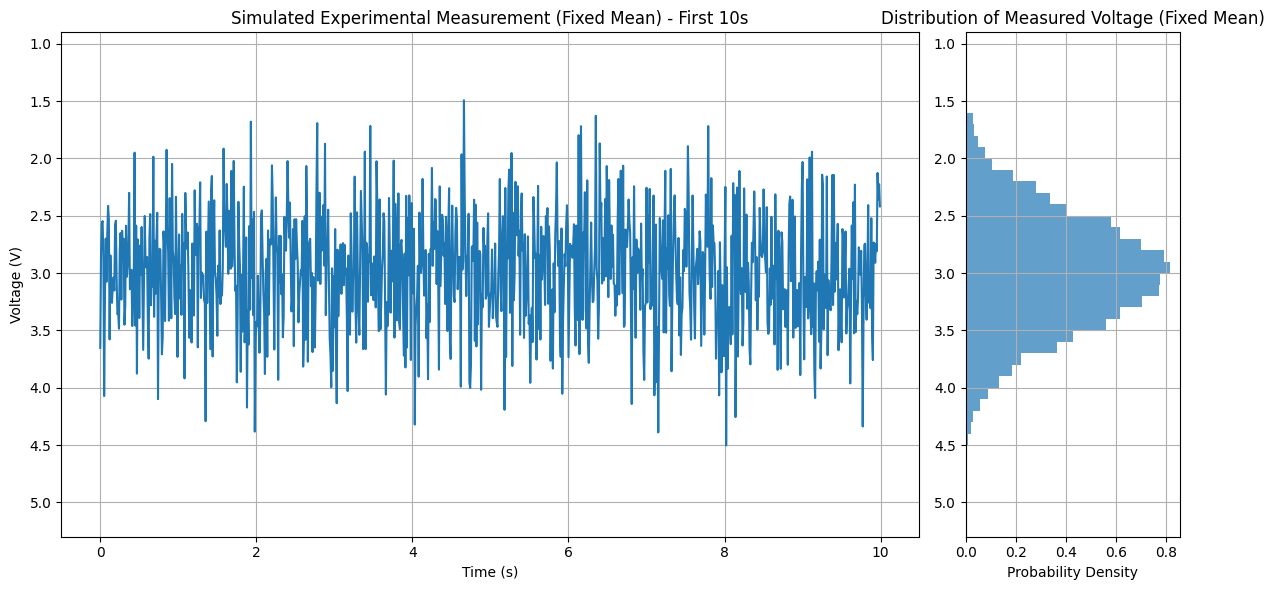

In [ ]:
# Simulation 1: Gaussian distribution with fixed mean and standard deviation
# Parameters
average_voltage = 3.0  # V
std_dev_voltage = 0.5  # V
sampling_rate = 100  # points per second
simulation_duration = 100  # seconds # Increased simulation duration
n_points_sim1 = simulation_duration * sampling_rate

# Generate time points
time_sim1 = np.linspace(0, simulation_duration, n_points_sim1)

# Generate simulated data with fixed mean and standard deviation
simulated_data_fixed = np.random.normal(average_voltage, std_dev_voltage, n_points_sim1)

# print("Simulated Data 1 (Fixed Mean) - first 10 points:", simulated_data_fixed[:10])
# print(f"Number of data points in Simulation 1: {n_points_sim1}")

# Plot the simulated data (first 10 seconds) and histogram
plt.figure(figsize=(12, 6))

# Subplot 1: Time series
# Use gridspec_kw to control relative widths
gs = plt.GridSpec(1, 2, width_ratios=[4, 1]) # Ratio 4:1 means left plot is 4 times wider than right

ax1 = plt.subplot(gs[0, 0]) # First subplot
ax1.plot(time_sim1[:sampling_rate*10], simulated_data_fixed[:sampling_rate*10]) # Plot only first 10 seconds
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Voltage (V)")
ax1.set_title("Simulated Experimental Measurement (Fixed Mean) - First 10s")
ax1.grid(True)

# Subplot 2: Histogram with swapped axes
ax2 = plt.subplot(gs[0, 1], sharey=ax1) # Second subplot, share y-axis with ax1
# Calculate the number of bins based on bin width of 0.1 V
bin_width = 0.1
min_voltage = np.floor(np.min(simulated_data_fixed) / bin_width) * bin_width
max_voltage = np.ceil(np.max(simulated_data_fixed) / bin_width) * bin_width
bins = np.arange(min_voltage, max_voltage + bin_width, bin_width)

# Calculate histogram counts and bin edges
counts, bin_edges = np.histogram(simulated_data_fixed, bins=bins, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Plot as a horizontal bar chart
ax2.barh(bin_centers, counts, height=bin_width, alpha=0.7)

ax2.set_xlabel("Probability Density")
ax2.set_title("Distribution of Measured Voltage (Fixed Mean)")
ax2.grid(True)
ax2.invert_yaxis() # Invert y-axis if needed to match convention, though typically not required for shared y-axis

plt.tight_layout() # Adjust layout to prevent overlap
plt.show()

#### With Drift

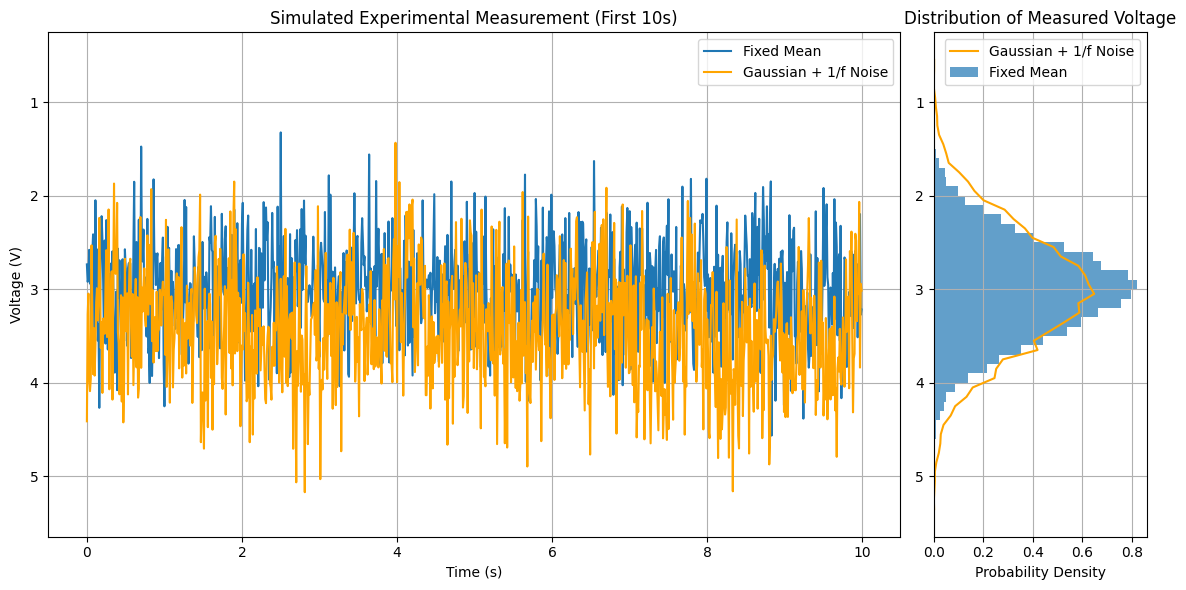

Fixed Mean Data
Sample Mean: 3.0027
Sample Variance: 0.2533
Sample Standard Deviation: 0.5033

With Drift
Sample Mean: 2.9965
Sample Variance: 0.4123
Sample Standard Deviation: 0.6421


In [ ]:
# Simulation 1: Gaussian distribution with fixed mean and standard deviation
# Parameters
average_voltage = 3.0  # V
std_dev_voltage = 0.5  # V
sampling_rate = 100  # points per second
simulation_duration = 100  # seconds # Increased simulation duration
n_points_sim1 = simulation_duration * sampling_rate

# Generate time points
time_sim1 = np.linspace(0, simulation_duration, n_points_sim1)

# Generate simulated data with fixed mean and standard deviation
simulated_data_fixed = np.random.normal(average_voltage, std_dev_voltage, n_points_sim1)

# print("Simulated Data 1 (Fixed Mean) - first 10 points:", simulated_data_fixed[:10])
# print(f"Number of data points in Simulation 1: {n_points_sim1}")

# Calculate MLEs for the data with fixed mean
mle_mean_fixed = np.mean(simulated_data_fixed)
mle_variance_fixed = np.sum((simulated_data_fixed - mle_mean_fixed)**2) / len(simulated_data_fixed)
mle_std_dev_fixed = np.sqrt(mle_variance_fixed)


# Calculate MLEs for the data with Gaussian + 1/f noise
# Note: The concept of a single 'mean' and 'variance' is less strictly applicable
# to a non-stationary signal like the one with 1/f noise.
# However, calculating the sample mean and variance over the entire time series
# gives us an idea of the overall central tendency and spread.
mle_mean_drifting = np.mean(simulated_data_drifting)
mle_variance_drifting = np.sum((simulated_data_drifting - mle_mean_drifting)**2) / len(simulated_data_drifting)
mle_std_dev_drifting = np.sqrt(mle_variance_drifting)

# Plot the simulated data (first 10 seconds) and histogram
plt.figure(figsize=(12, 6))

# Subplot 1: Time series
# Use gridspec_kw to control relative widths
gs = plt.GridSpec(1, 2, width_ratios=[4, 1]) # Ratio 4:1 means left plot is 4 times wider than right

ax1 = plt.subplot(gs[0, 0]) # First subplot
ax1.plot(time_sim1[:sampling_rate*10], simulated_data_fixed[:sampling_rate*10], label='Fixed Mean') # Plot only first 10 seconds and add label
ax1.plot(time_sim2[:sampling_rate*10], simulated_data_drifting[:sampling_rate*10], color='orange', label='Gaussian + 1/f Noise') # Plot drifting data (first 10 seconds) and add label
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Voltage (V)")
ax1.set_title("Simulated Experimental Measurement (First 10s)")
ax1.grid(True)
ax1.legend() # Add legend to time series plot

# Subplot 2: Histogram with swapped axes
ax2 = plt.subplot(gs[0, 1], sharey=ax1) # Second subplot, share y-axis with ax1
# Calculate the number of bins based on bin width of 0.1 V
bin_width = 0.1
min_voltage = np.floor(np.min([simulated_data_fixed, simulated_data_drifting]) / bin_width) * bin_width # Determine min/max across both datasets
max_voltage = np.ceil(np.max([simulated_data_fixed, simulated_data_drifting]) / bin_width) * bin_width
bins = np.arange(min_voltage, max_voltage + bin_width, bin_width)

# Calculate histogram counts and bin edges for both datasets
counts_fixed, bin_edges = np.histogram(simulated_data_fixed, bins=bins, density=True)
counts_drifting, _ = np.histogram(simulated_data_drifting, bins=bins, density=True) # No need for bin_edges again
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Plot as a horizontal bar chart for fixed mean data
ax2.barh(bin_centers, counts_fixed, height=bin_width, alpha=0.7, label='Fixed Mean')

# Plot as a horizontal line for drifting data histogram
ax2.plot(counts_drifting, bin_centers, color='orange', label='Gaussian + 1/f Noise')


ax2.set_xlabel("Probability Density")
ax2.set_title("Distribution of Measured Voltage")
ax2.grid(True)
ax2.invert_yaxis() # Invert y-axis if needed to match convention, though typically not required for shared y-axis
ax2.legend() # Add legend to histogram plot

plt.tight_layout() # Adjust layout to prevent overlap
plt.show()

# print("Simulated Data 1 (Fixed Mean) - first 10 points:", simulated_data_fixed[:10])
# print(f"Number of data points in Simulation 1: {n_points_sim1}")

print("Fixed Mean Data")
print(f"Sample Mean: {mle_mean_fixed:.4f}")
print(f"Sample Variance: {mle_variance_fixed:.4f}")
print(f"Sample Standard Deviation: {mle_std_dev_fixed:.4f}")

print("\nWith Drift")
print(f"Sample Mean: {mle_mean_drifting:.4f}")
print(f"Sample Variance: {mle_variance_drifting:.4f}")
print(f"Sample Standard Deviation: {mle_std_dev_drifting:.4f}")

# FREQUENCY DOMAIN ANALYSIS

## Observing the Power Spectral Density

One way to look for noise is a signal is to use a Fourier transform to calculate the power spectra density. It compares the magnitudes of the variation observed at different time scales.  

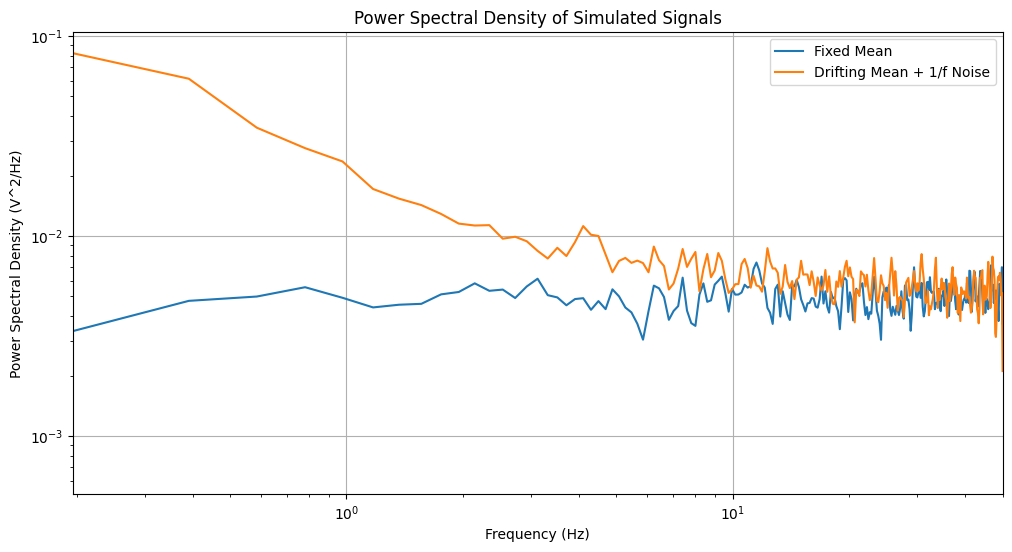

In [13]:
from scipy.signal import welch

# Calculate the power spectral density for each signal
# Using Welch's method for spectral density estimation
fs = sampling_rate # Sampling frequency
f_fixed, psd_fixed = welch(simulated_data_fixed, fs=fs, nperseg=512)
f_drifting, psd_drifting = welch(simulated_data_drifting, fs=fs, nperseg=512)

# Plot the power spectra
plt.figure(figsize=(12, 6))
plt.loglog(f_fixed, psd_fixed, label='Fixed Mean') # Changed to loglog
plt.loglog(f_drifting, psd_drifting, label='Drifting Mean + 1/f Noise') # Changed to loglog and updated label
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (V^2/Hz)')
plt.title('Power Spectral Density of Simulated Signals')
plt.grid(True)
plt.legend()
plt.xlim([f_fixed[1], fs/2]) # Limit frequency to Nyquist frequency, starting from the second frequency
plt.show()

We can see that at low frequencies, there is a lot of variation in the signal, making it difficult to judge the average value 'by eye'. Possible steps are to eliminate the noise source or average over longer times.

## Cumulative power spectrum

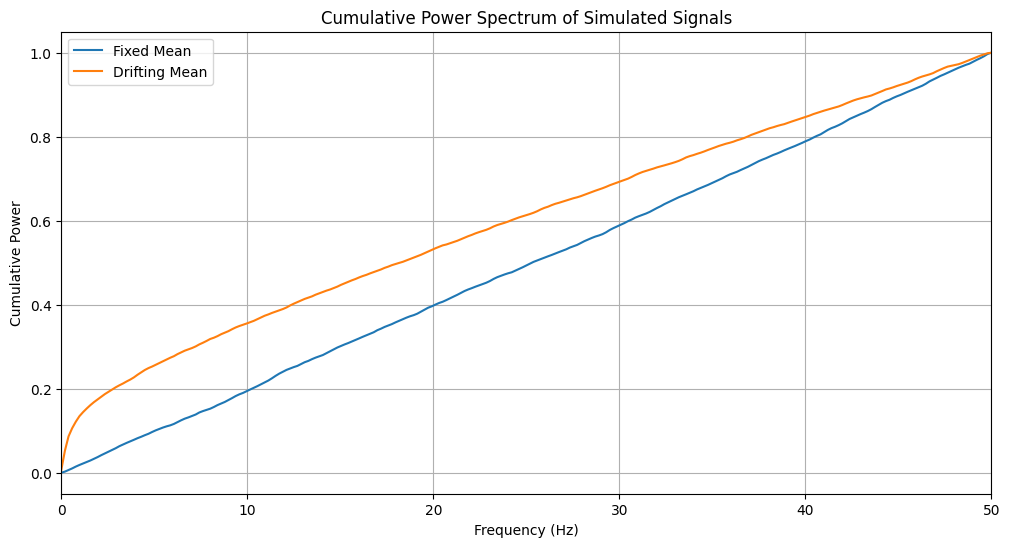

In [14]:
# Calculate the cumulative power spectrum
cumulative_psd_fixed = np.cumsum(psd_fixed)
cumulative_psd_drifting = np.cumsum(psd_drifting)

# Normalize the cumulative power spectra for easier comparison (optional)
cumulative_psd_fixed /= cumulative_psd_fixed[-1]
cumulative_psd_drifting /= cumulative_psd_drifting[-1]

# Plot the cumulative power spectra
plt.figure(figsize=(12, 6))
plt.plot(f_fixed, cumulative_psd_fixed, label='Fixed Mean')
plt.plot(f_drifting, cumulative_psd_drifting, label='Drifting Mean')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Cumulative Power')
plt.title('Cumulative Power Spectrum of Simulated Signals')
plt.grid(True)
plt.legend()
plt.xlim([0, fs/2]) # Limit frequency to Nyquist frequency
plt.show()

# Example 4 Post-Assignment: Exponential Distribution

We can now apply the Maximum Likelihood Estimation to the exponential distribution. The probability density function (PDF) for an exponential distribution with rate parameter $\lambda$ is given by:

$$f(x | \lambda) = \lambda e^{-\lambda x}, \quad \text{for } x \ge 0$$

This distribution is often used to model the time until an event occurs in a Poisson process, where $\lambda$ is the average rate of events.

